In [1]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn. linear_model import Ridge,  Lasso, ElasticNet
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc('font',family = 'Noto Sans CJK JP')
import os
os.getcwd()
path = '/home/piai/다운로드'

In [2]:
df_chaju = pd.read_csv(path + "/CreDB_chaju.CSV", engine = "python", encoding="cp949")
df_card = pd.read_csv(path + "/CreDB_card.csv", engine = "python", encoding="cp949")
df_loan = pd.read_csv(path + "/CreDB_loan.csv", engine = "python", encoding="cp949")
df_overdue = pd.read_csv(path + "/CreDB_overdue.csv", engine = "python", encoding="cp949")

In [3]:
df_age=df_chaju[['chaju_id','agegroup']]
df_age

,chaju_id,agegroup
0,C-1001,30대
1,C-1002,60대
2,C-1003,40대
3,C-1004,20대
4,C-1005,50대
...,...,...
1979,C-2996,40대
1980,C-2997,30대
1981,C-2998,50대
1982,C-2999,40대


In [4]:
df_overdue_drop_month=df_overdue.drop_duplicates(['chaju_id','over_amt','over_ym','com_id'],keep = 'first')
df_overdue_drop_month

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1019,S01-01001,202008,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
13,C-1019,S05-01002,202004,S05,신용카드사(S05),공공(2),R-0104,신용카드대금연체,특수채권(7),201811,900000
30,C-1019,S98-01028,202004,S98,기타-장학재단/기금 등(S98),공공(2),R-0202,신용보증대지급금,주채무자(0),201906,12000000
49,C-1019,S98-01049,202009,S98,기타-장학재단/기금 등(S98),공공(2),R-0101,대출원금·이자연체,주채무자(0),201604,10000000
...,...,...,...,...,...,...,...,...,...,...,...
10723,C-2987,S05-01010,202012,S05,신용카드사(S05),공공(2),R-0103,장기카드대출(카드론)연체,특수채권(7),201801,5200000
10748,C-2987,S17-01085,201812,S17,캐피탈/할부/리스 등(S17),공공(2),R-0101,대출원금·이자연체,특수채권(7),201807,630000
10749,C-2987,S21-01019,201903,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),201810,9600000
10753,C-2992,S98-01041,202011,S98,기타-장학재단/기금 등(S98),공공(2),R-0202,신용보증대지급금,주채무자(0),201411,9600000


In [5]:
grouped=df_overdue_drop_month['over_amt'].groupby(df_overdue_drop_month['chaju_id'])
df_total_over_amt=pd.DataFrame(grouped.sum())
df_total_over_amt

,over_amt
chaju_id,
C-1001,5700000
C-1019,292900000
C-1029,880000
C-1030,8000000
C-1036,95000000
...,...
C-2972,54170000
C-2984,2110000
C-2987,19230000


# 나이별 연체율

In [6]:
df_age_over_amt = pd.merge(df_age, df_total_over_amt, on='chaju_id', how='inner')
df_age_over_amt

,chaju_id,agegroup,over_amt
0,C-1001,30대,5700000
1,C-1019,40대,292900000
2,C-1029,50대,880000
3,C-1030,40대,8000000
4,C-1036,60대,95000000
...,...,...,...
395,C-2972,40대,54170000
396,C-2984,50대,2110000
397,C-2987,30대,19230000
398,C-2992,40대,9600000


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format

In [63]:
df_age_over_amt_mean = df_age_over_amt.groupby(['agegroup'],as_index=False)[['over_amt']].mean()
df_age_over_amt_mean

,agegroup,over_amt
0,20대,25386451.6
1,30대,16704800.0
2,40대,31173539.8
3,50대,49550404.0
4,60대,59110508.5
5,70대,41810000.0
6,80대이상,12818571.4


In [9]:
df_age_over_amt_mean['agegroup']

0      20대
1      30대
2      40대
3      50대
4      60대
5      70대
6    80대이상
Name: agegroup, dtype: object

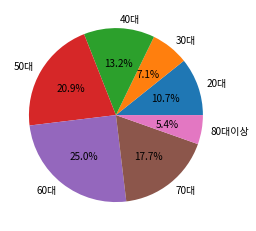

In [61]:
labels = ['20대','30대','40대','50대','60대','70대','80대이상']
ratio = ['25386451.6','16704800.0','31173539.8','49550404.0','59110508.5','41810000.0','12818571.4']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 성별 연체율

In [11]:
df_gender=df_chaju[['chaju_id','gender']]
df_gender

,chaju_id,gender
0,C-1001,남성
1,C-1002,여성
2,C-1003,남성
3,C-1004,남성
4,C-1005,남성
...,...,...
1979,C-2996,남성
1980,C-2997,남성
1981,C-2998,여성
1982,C-2999,남성


In [12]:
df_gender_over_amt = pd.merge(df_gender, df_total_over_amt, on='chaju_id', how='inner')
df_gender_over_amt

,chaju_id,gender,over_amt
0,C-1001,남성,5700000
1,C-1019,남성,292900000
2,C-1029,여성,880000
3,C-1030,남성,8000000
4,C-1036,남성,95000000
...,...,...,...
395,C-2972,남성,54170000
396,C-2984,여성,2110000
397,C-2987,남성,19230000
398,C-2992,남성,9600000


In [13]:
df_gender_over_amt_mean = df_gender_over_amt.groupby(['gender'],as_index=False)[['over_amt']].mean()
df_gender_over_amt_mean

,gender,over_amt
0,남성,42724022.6
1,여성,24996716.4


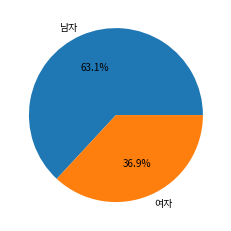

In [56]:
labels = ['남자','여자']
ratio = ['42724022.6','24996716.4']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 직업별 연체율

In [14]:
df_job=df_chaju[['chaju_id','job']]
df_job

,chaju_id,job
0,C-1001,기능/노무직
1,C-1002,전업주부
2,C-1003,판매/서비스직
3,C-1004,무직/기타
4,C-1005,행정관리/전문직
...,...,...
1979,C-2996,사무직
1980,C-2997,사무직
1981,C-2998,기능/노무직
1982,C-2999,기능/노무직


In [15]:
df_job_over_amt = pd.merge(df_job, df_total_over_amt, on='chaju_id', how='inner')
df_job_over_amt

,chaju_id,job,over_amt
0,C-1001,기능/노무직,5700000
1,C-1019,무직/기타,292900000
2,C-1029,판매/서비스직,880000
3,C-1030,사무직,8000000
4,C-1036,기능/노무직,95000000
...,...,...,...
395,C-2972,행정관리/전문직,54170000
396,C-2984,기능/노무직,2110000
397,C-2987,사무직,19230000
398,C-2992,사무직,9600000


In [16]:
df_job_over_amt_mean = df_job_over_amt.groupby(['job'],as_index=False)[['over_amt']].mean()
df_job_over_amt_mean

,job,over_amt
0,기능/노무직,44694842.1
1,무직/기타,45955384.6
2,사무직,41293827.2
3,전업주부,22310000.0
4,판매/서비스직,26901428.6
5,학생(재수생포함),31431250.0
6,행정관리/전문직,40270731.7


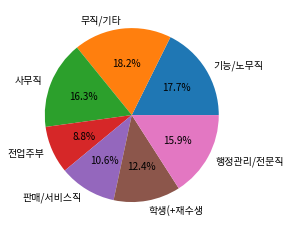

In [64]:
labels = ['기능/노무직','무직/기타','사무직','전업주부','판매/서비스직','학생(+재수생','행정관리/전문직']
ratio = ['44694842.1','45955384.6','41293827.2','22310000.0','26901428.6','31431250.0','40270731.7']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 교육수준별 연체율

In [17]:
df_edu=df_chaju[['chaju_id','edu']]
df_edu

,chaju_id,edu
0,C-1001,대학교 졸업
1,C-1002,초등학교 졸업
2,C-1003,대학교 졸업
3,C-1004,대학교 졸업
4,C-1005,대학교 졸업
...,...,...
1979,C-2996,대학교 졸업
1980,C-2997,대학교 졸업
1981,C-2998,고등학교 졸업
1982,C-2999,전문대학 졸업


In [18]:
df_edu_over_amt = pd.merge(df_edu, df_total_over_amt, on='chaju_id', how='inner')
df_edu_over_amt

,chaju_id,edu,over_amt
0,C-1001,대학교 졸업,5700000
1,C-1019,대학교 졸업,292900000
2,C-1029,고등학교 졸업,880000
3,C-1030,대학교 졸업,8000000
4,C-1036,고등학교 졸업,95000000
...,...,...,...
395,C-2972,대학원 졸업,54170000
396,C-2984,고등학교 졸업,2110000
397,C-2987,대학교 졸업,19230000
398,C-2992,대학교 졸업,9600000


In [19]:
df_edu_over_amt_mean = df_edu_over_amt.groupby(['edu'],as_index=False)[['over_amt']].mean()
df_edu_over_amt_mean

,edu,over_amt
0,고등학교 졸업,51521678.3
1,대학교 재학,45569000.0
2,대학교 졸업,17636319.4
3,대학원 재학,7697500.0
4,대학원 졸업,64880588.2
5,전문대학 졸업,44157647.1
6,중학교 졸업,32579285.7
7,초등학교 졸업,17736666.7


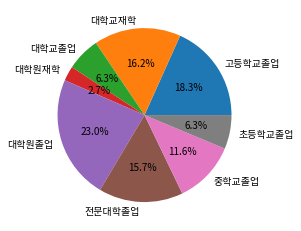

In [66]:
labels = ['고등학교졸업','대학교재학','대학교졸업','대학원재학','대학원졸업','전문대학졸업','중학교졸업','초등학교졸업']
ratio = ['51521678.3','45569000.0','17636319.4','7697500.0','64880588.2','44157647.1','32579285.7','17736666.7']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 주거형태별 연체율

In [20]:
df_dwell_type=df_chaju[['chaju_id','dwell_type']]
df_dwell_type

,chaju_id,dwell_type
0,C-1001,자가
1,C-1002,자가
2,C-1003,자가
3,C-1004,자가
4,C-1005,자가
...,...,...
1979,C-2996,자가
1980,C-2997,자가
1981,C-2998,자가
1982,C-2999,전세


In [21]:
df_dwell_type_over_amt = pd.merge(df_dwell_type, df_total_over_amt, on='chaju_id', how='inner')
df_dwell_type_over_amt

,chaju_id,dwell_type,over_amt
0,C-1001,자가,5700000
1,C-1019,자가,292900000
2,C-1029,자가,880000
3,C-1030,자가,8000000
4,C-1036,자가,95000000
...,...,...,...
395,C-2972,자가,54170000
396,C-2984,자가,2110000
397,C-2987,자가,19230000
398,C-2992,자가,9600000


In [22]:
df_dwell_type_over_amt_mean = df_dwell_type_over_amt.groupby(['dwell_type'],as_index=False)[['over_amt']].mean()
df_dwell_type_over_amt_mean

,dwell_type,over_amt
0,사택/기타,13552500.0
1,영구임대,13900000.0
2,월세,10571666.7
3,자가,40038402.6
4,전세,28388000.0


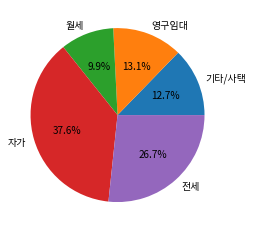

In [286]:
labels = ['기타/사택','영구임대','월세','자가','전세']
ratio = ['13552500.0','13900000.0','10571666.7','40038402.6','28388000.0']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 주택형태별 연체율

In [23]:
df_house_type=df_chaju[['chaju_id','house_type']]
df_house_type

,chaju_id,house_type
0,C-1001,아파트
1,C-1002,아파트
2,C-1003,아파트
3,C-1004,아파트
4,C-1005,아파트
...,...,...
1979,C-2996,단독주택
1980,C-2997,아파트
1981,C-2998,아파트
1982,C-2999,아파트


In [24]:
df_house_type_over_amt = pd.merge(df_house_type, df_total_over_amt, on='chaju_id', how='inner')
df_house_type_over_amt

,chaju_id,house_type,over_amt
0,C-1001,아파트,5700000
1,C-1019,아파트,292900000
2,C-1029,아파트,880000
3,C-1030,아파트,8000000
4,C-1036,아파트,95000000
...,...,...,...
395,C-2972,단독주택,54170000
396,C-2984,아파트,2110000
397,C-2987,아파트,19230000
398,C-2992,단독주택,9600000


In [25]:
df_house_type_over_amt_mean = df_house_type_over_amt.groupby(['house_type'],as_index=False)[['over_amt']].mean()
df_house_type_over_amt_mean

,house_type,over_amt
0,기타,26100000.0
1,단독주택,34515517.2
2,상가주택,12252500.0
3,아파트,39299237.3
4,연립/다세대/빌라,33497285.7
5,오피스텔,8380000.0


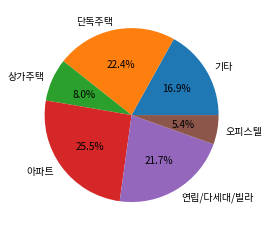

In [67]:
labels = ['기타','단독주택','상가주택','아파트','연립/다세대/빌라','오피스텔']
ratio = ['26100000.0','34515517.2','12252500.0','39299237.3','33497285.7','8380000.0']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 결혼상태별 연체율

In [26]:
df_marriage = df_chaju[['chaju_id','marriage']]
df_marriage

,chaju_id,marriage
0,C-1001,미혼
1,C-1002,기혼
2,C-1003,기혼
3,C-1004,미혼
4,C-1005,기혼
...,...,...
1979,C-2996,미혼
1980,C-2997,기혼
1981,C-2998,기혼
1982,C-2999,기혼


In [27]:
df_marriage_over_amt = pd.merge(df_marriage, df_total_over_amt, on='chaju_id', how='inner')
df_marriage_over_amt

,chaju_id,marriage,over_amt
0,C-1001,미혼,5700000
1,C-1019,기혼,292900000
2,C-1029,기혼,880000
3,C-1030,기혼,8000000
4,C-1036,기혼,95000000
...,...,...,...
395,C-2972,기혼,54170000
396,C-2984,기혼,2110000
397,C-2987,기혼,19230000
398,C-2992,기혼,9600000


In [28]:
df_marriage_over_amt_mean = df_marriage_over_amt.groupby(['marriage'],as_index=False)[['over_amt']].mean()
df_marriage_over_amt_mean

,marriage,over_amt
0,기타(이혼/별거/사별),68551176.5
1,기혼,38083815.8
2,미혼,24953164.6


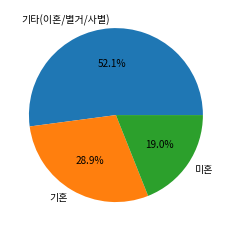

In [57]:
labels = ['기타(이혼/별거/사별)','기혼','미혼']
ratio = ['68551176.5','38083815.8','24953164.6']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 자녀유무별 연체율

In [29]:
df_child_cd = df_chaju[['chaju_id','child_cd']]
df_child_cd

,chaju_id,child_cd
0,C-1001,Y
1,C-1002,N
2,C-1003,N
3,C-1004,Y
4,C-1005,N
...,...,...
1979,C-2996,Y
1980,C-2997,N
1981,C-2998,N
1982,C-2999,N


In [30]:
df_child_cd_over_amt = pd.merge(df_child_cd, df_total_over_amt, on='chaju_id', how='inner')
df_child_cd_over_amt

,chaju_id,child_cd,over_amt
0,C-1001,Y,5700000
1,C-1019,N,292900000
2,C-1029,N,880000
3,C-1030,N,8000000
4,C-1036,N,95000000
...,...,...,...
395,C-2972,N,54170000
396,C-2984,N,2110000
397,C-2987,N,19230000
398,C-2992,Y,9600000


In [31]:
df_child_cd_over_amt_mean = df_child_cd_over_amt.groupby(['child_cd'],as_index=False)[['over_amt']].mean()
df_child_cd_over_amt_mean

,child_cd,over_amt
0,N,40938741.7
1,Y,23986224.5


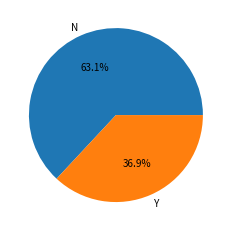

In [59]:
labels = ['N','Y']
ratio = ['40938741.7','23986224.5']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 자녀 수 별 연체율

In [32]:
df_no_child = df_chaju[['chaju_id','no_child']]
df_no_child

,chaju_id,no_child
0,C-1001,0
1,C-1002,3
2,C-1003,2
3,C-1004,0
4,C-1005,2
...,...,...
1979,C-2996,0
1980,C-2997,2
1981,C-2998,2
1982,C-2999,2


In [33]:
df_no_child_over_amt = pd.merge(df_no_child, df_total_over_amt, on='chaju_id', how='inner')
df_no_child_over_amt

,chaju_id,no_child,over_amt
0,C-1001,0,5700000
1,C-1019,2,292900000
2,C-1029,2,880000
3,C-1030,1,8000000
4,C-1036,2,95000000
...,...,...,...
395,C-2972,2,54170000
396,C-2984,2,2110000
397,C-2987,2,19230000
398,C-2992,0,9600000


In [34]:
df_no_child_over_amt_mean = df_no_child_over_amt.groupby(['no_child'],as_index=False)[['over_amt']].mean()
df_no_child_over_amt_mean

,no_child,over_amt
0,0,23986224.5
1,1,34186981.1
2,2,42754955.8
3,3,38650869.6


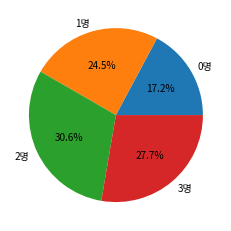

In [60]:
labels = ['0명','1명','2명','3명']
ratio = ['23986224.5','34186981.1','42754955.8','38650869.6']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 개인사업자 여부별 연체율

In [35]:
df_flag_priv_biz_cd = df_chaju[['chaju_id','flag_priv_biz_cd']]
df_flag_priv_biz_cd 

,chaju_id,flag_priv_biz_cd
0,C-1001,N
1,C-1002,Y
2,C-1003,N
3,C-1004,N
4,C-1005,N
...,...,...
1979,C-2996,N
1980,C-2997,N
1981,C-2998,N
1982,C-2999,N


In [41]:
df_flag_priv_biz_cd_over_amt = pd.merge(df_flag_priv_biz_cd, df_total_over_amt, on='chaju_id', how='inner')
df_flag_priv_biz_cd_over_amt

,chaju_id,flag_priv_biz_cd,over_amt
0,C-1001,N,5700000
1,C-1019,N,292900000
2,C-1029,N,880000
3,C-1030,N,8000000
4,C-1036,N,95000000
...,...,...,...
395,C-2972,N,54170000
396,C-2984,N,2110000
397,C-2987,N,19230000
398,C-2992,N,9600000


In [37]:
df_flag_priv_biz_cd_over_amt_mean = df_flag_priv_biz_cd_over_amt.groupby(['flag_priv_biz_cd'],as_index=False)[['over_amt']].mean()
df_flag_priv_biz_cd_over_amt_mean

,flag_priv_biz_cd,over_amt
0,N,36746375.7
1,Y,37455454.5


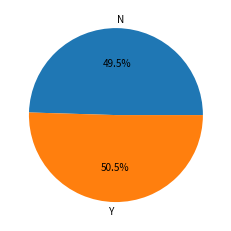

In [55]:
labels = ['N','Y']
ratio = ['36746375.7','37455454.5']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 전체 데이터 비교

## 각 데이터 분석

### chaju

In [248]:
a = df_chaju['chaju_id']
a = list(a)
print(len(a))

1984


### card

In [262]:
#카드
df_card_drop_month=df_card.drop_duplicates(['chaju_id','sector','card_ym','com_id'],keep = 'first')
df_card_drop_month
df_card_count=df_card_drop_month.groupby(["chaju_id"]).count()["card_cd"]
df_card_count = pd.DataFrame(df_card_count)
df_card_count = df_card_count.reset_index()
b = df_card_count['chaju_id']
b = list(b)

### loan

In [263]:
#대출
df_loan_drop_month=df_loan.drop_duplicates(['chaju_id','loan_amt','loan_ym','com_id'],keep = 'first')
df_loan_drop_month
grouped=df_loan_drop_month['loan_amt'].groupby(df_loan_drop_month['chaju_id'])
df_total_loan_amt=pd.DataFrame(grouped.sum())
df_total_loan_amt=df_total_loan_amt.reset_index()
c = df_total_loan_amt['chaju_id']
c = list(c)

### overdue

In [251]:
#연체
#df_raw4.duplicated(['loan_amt','loan_ym','com_id'],keep = 'first')
df_overdue_drop_month=df_overdue.drop_duplicates(['chaju_id','over_amt','over_ym','com_id'],keep = 'first')
df_overdue_drop_month
grouped=df_overdue_drop_month['over_amt'].groupby(df_overdue_drop_month['chaju_id'])
df_total_over_amt=pd.DataFrame(grouped.sum())
df_total_over_amt =df_total_over_amt.reset_index()
d = df_total_over_amt['chaju_id']
d = list(d)

### overdue&loan

In [252]:
#overdue & loan
overdue_loan_inter = list(set(c) & set(d))
print(len(overdue_loan_inter))

299


### only overdue

In [264]:
#overdue
over_dif = list(set(d)-set(overdue_inter))
print(len(over_dif))

101


### only loan

In [254]:
#loan
loan_dif = list(set(c)-set(overdue_loan_inter))
print(len(loan_dif))

1029


### overdue+loan

In [255]:
#overdue, loan
over_loan = list(set(overdue_loan_inter) | set(over_dif) | set(loan_dif))
print(len(over_loan))

1429


### only card

In [256]:
#card
card_dif = list(set(a)-set(over_loan))
print(len(card_dif))

555


In [261]:
card = list(set(b) & set(card_dif))
print(len(card))

493


### thin_filer

In [269]:
all = list(set(card) | set(loan_dif) | set(over_loan))

In [270]:
thin_filer = list(set(a)-set(all))
print(len(thin_filer))

62


## pieplot

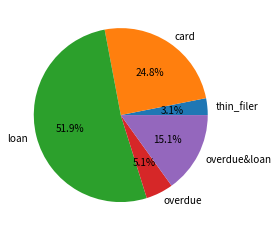

In [271]:
labels = ['thin_filer','card','loan','overdue','overdue&loan']
ratio = ['62','493','1029','101','299']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

# 빅데이터

In [71]:
# 중복값 제거
#df_raw4.duplicated(['loan_amt','loan_ym','com_id'],keep = 'first')
df_overdue_drop_month=df_overdue.drop_duplicates(['chaju_id','over_amt','over_ym','com_id'],keep = 'first')

In [ ]:
연체자-중복제거

In [131]:
grouped=df_overdue_drop_month['over_amt'].groupby(df_overdue_drop_month['chaju_id'])
df_total_over_amt=pd.DataFrame(grouped.sum())
df_total_over_amt=df_total_over_amt.reset_index()
df_total_over_amt

,chaju_id,over_amt
0,C-1001,5700000
1,C-1019,292900000
2,C-1029,880000
3,C-1030,8000000
4,C-1036,95000000
...,...,...
395,C-2972,54170000
396,C-2984,2110000
397,C-2987,19230000
398,C-2992,9600000


In [275]:
a = set(df_loan["chaju_id"])
b = set(df_overdue['chaju_id'])
df_only_overdue = b-a
df_overdue_list = list(df_only_overdue)

연체자만 추출

In [276]:
import pandas as pd
overdue_list=df_overdue_list
df_over_list=pd.DataFrame([overdue_list])
df_over_list=df_over_list.transpose()
df=df_over_list.rename(columns={0:'chaju_id'})
df

,chaju_id
0,C-2354
1,C-1520
2,C-2684
3,C-1228
4,C-2855
...,...
96,C-1915
97,C-2808
98,C-1307
99,C-1030


In [137]:
df_overdue

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
1,C-1001,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1019,S01-01001,202008,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
3,C-1019,S01-01001,202003,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
4,C-1019,S01-01001,202006,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
...,...,...,...,...,...,...,...,...,...,...,...
10779,C-2994,S98-01024,201904,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201505,500000
10780,C-2994,S98-01024,201903,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201505,500000
10781,C-2994,S98-01024,201902,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201505,500000
10782,C-2994,S98-01024,201901,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201505,500000


연체자 추출 후 overdue 내용과 결합

In [140]:
df_total_over_amt = pd.merge(df, df_overdue, on='chaju_id', how='inner')
df_total_over_amt

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-2354,S98-01029,202012,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201811,2600000
1,C-2354,S98-01029,202011,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201811,2600000
2,C-2354,S98-01029,202009,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201811,2600000
3,C-2354,S98-01029,202008,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201811,2600000
4,C-2354,S98-01029,202007,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201811,2600000
...,...,...,...,...,...,...,...,...,...,...,...
1788,C-1414,S98-01016,201903,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201706,930000
1789,C-1414,S98-01016,201905,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201706,930000
1790,C-1414,S98-01016,201902,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201706,930000
1791,C-1414,S98-01016,201901,S98,기타-장학재단/기금 등(S98),공공(2),R-0201,지급보증대지급금,주채무자(0),201706,930000


## 연체자 구분

In [280]:
df_over_period=df_overdue.groupby(["chaju_id"]).count()["over_amt"]
df_over_period = pd.DataFrame(df_over_period)
df_over_period.rename(columns= {'over_amt':'over_period'},inplace = True)
df_over_period = df_over_period.reset_index()

In [284]:
df_total_amt_period = pd.merge(df_total_over_amt, df_over_period, on='chaju_id', how='inner')
df_total_amt_period

,chaju_id,over_amt,over_period
0,C-1001,5700000,2
1,C-1019,292900000,72
2,C-1029,880000,5
3,C-1030,8000000,12
4,C-1036,95000000,25
...,...,...,...
395,C-2972,54170000,64
396,C-2984,2110000,43
397,C-2987,19230000,56
398,C-2992,9600000,25


In [288]:
a=[]
for a in range(len(over_period)):
    if a<=3:
    print(a)
    if a<=6:
    

IndentationError: expected an indented block (<ipython-input-288-56c871e12fbc>, line 3)

In [ ]:
9